# BRFSS Data evaluation

## Obesity total

Query:  
- LocationDesc: National  
- Class: Obesity / Weight Status  
- Total: Total  

In [30]:
import os
import sqlalchemy
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
#print(os.getcwd())

In [1]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/brfss.sqlite')
# with dbEngine.connect() as conn:
#     brfss = pd.read_sql('select * from brfss',conn)
with dbEngine.connect() as conn:
    sqlstatement_obese = "select YearStart, YearEnd, LocationAbbr, LocationDesc, Class, Question, Data_Value, Data_Value_Alt, Data_Value_Footnote, Low_Confidence_Limit, 'High_Confidence_Limit ', Sample_Size from brfss where LocationDesc = 'National' and Class = 'Obesity / Weight Status' and Total = 'Total' and Question like '%aged 18 years and older who have obesity' order by YearStart"
    brfss_obesity = pd.read_sql_query(sqlstatement_obese, conn)
    brfss_obesity = brfss_obesity.set_index('YearStart')
    brfss_obesity['Data_Value'] = brfss_obesity['Data_Value'].astype("float")
    
#print(brfss_obesity)


NameError: name 'sqlalchemy' is not defined

c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Agnes\AppData\Local\Temp\ipykernel_4056\3570757428.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_value)


[Text(0, 27.0, '27.00%'),
 Text(0, 28.0, '28.00%'),
 Text(0, 29.0, '29.00%'),
 Text(0, 30.0, '30.00%'),
 Text(0, 31.0, '31.00%'),
 Text(0, 32.0, '32.00%'),
 Text(0, 33.0, '33.00%'),
 Text(0, 34.0, '34.00%')]

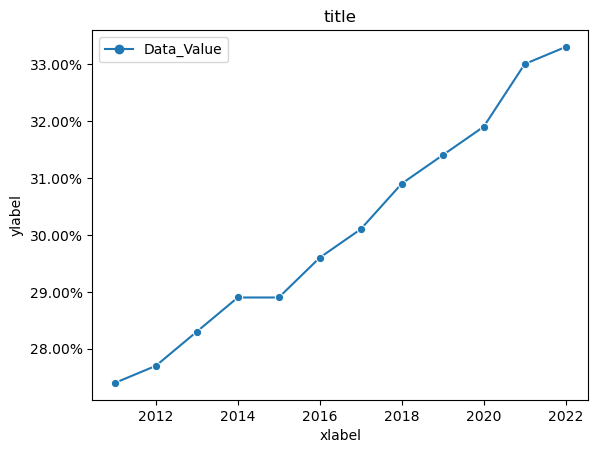

In [3]:
#brfss_obesity.plot(y='Data_Value')

df = pd.DataFrame(brfss_obesity, columns=['Data_Value'])
ax = sns.lineplot(data=df, markers = True)
ax.set(xlabel='xlabel', ylabel='ylabel', title='title')
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

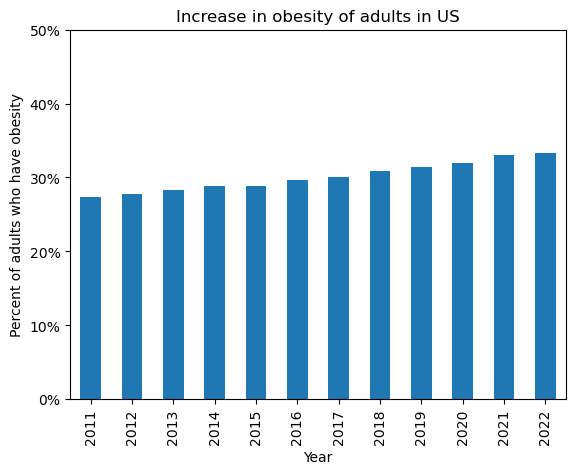

In [4]:
ax = brfss_obesity['Data_Value'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim([0,50])
ax.set(xlabel='Year', ylabel='Percent of adults who have obesity', title='Increase in obesity of adults in US');

In [5]:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/brfss.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select YearStart, Data_Value, \"Age(years)\"  from brfss where LocationDesc = 'National' and length(\"Age(years)\") > 0 and Question like '%aged 18 years and older who have obesity' order by StratificationID1, YearStart asc;"
    brfss_obesity_age_group = pd.read_sql_query(sqlstatement_obese, conn)
    brfss_obesity_age_group = brfss_obesity_age_group.set_index('Age(years)')
    brfss_obesity_age_group['Data_Value'] = brfss_obesity_age_group['Data_Value'].astype("float")
    
print(brfss_obesity_age_group)
brfss_obesity_age_group_1824 = brfss_obesity_age_group.iloc[0:12]
brfss_obesity_age_group_1824 = brfss_obesity_age_group_1824.set_index('YearStart')
print(brfss_obesity_age_group_1824)
brfss_obesity_age_group_2534 = brfss_obesity_age_group.iloc[13:25]
brfss_obesity_age_group_2534 = brfss_obesity_age_group_2534.set_index('YearStart')
print(brfss_obesity_age_group_2534)

print(np.mean(brfss_obesity_age_group_1824))
print(np.mean(brfss_obesity_age_group_2534))

             YearStart  Data_Value
Age(years)                        
18 - 24           2011        15.2
18 - 24           2012        15.0
18 - 24           2013        15.4
18 - 24           2014        15.9
18 - 24           2015        16.7
...                ...         ...
65 or older       2018        28.9
65 or older       2019        29.3
65 or older       2020        29.3
65 or older       2021        29.5
65 or older       2022        30.6

[72 rows x 2 columns]
           Data_Value
YearStart            
2011             15.2
2012             15.0
2013             15.4
2014             15.9
2015             16.7
2016             17.3
2017             16.5
2018             18.1
2019             18.9
2020             19.5
2021             20.7
2022             20.5
           Data_Value
YearStart            
2012             25.6
2013             26.4
2014             27.0
2015             26.7
2016             27.2
2017             28.2
2018             29.5
2019            

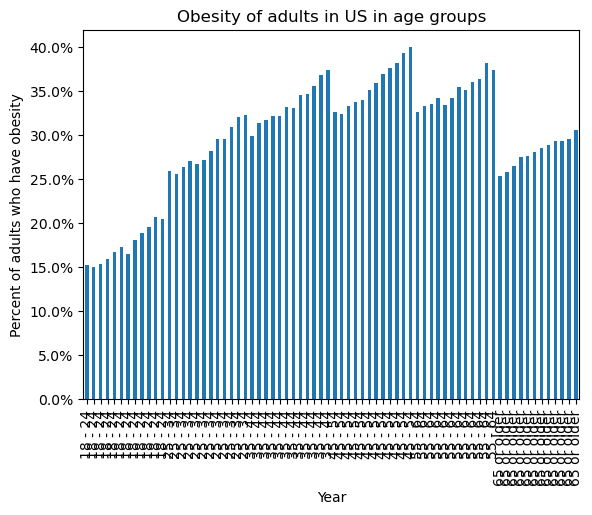

In [6]:
ax = brfss_obesity_age_group['Data_Value'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xlabel='Year', ylabel='Percent of adults who have obesity', title='Obesity of adults in US in age groups');

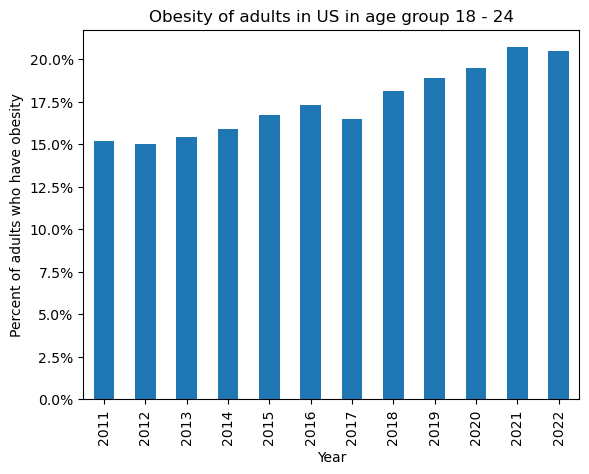

In [7]:
ax = brfss_obesity_age_group_1824['Data_Value'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xlabel='Year', ylabel='Percent of adults who have obesity', title='Obesity of adults in US in age group 18 - 24');

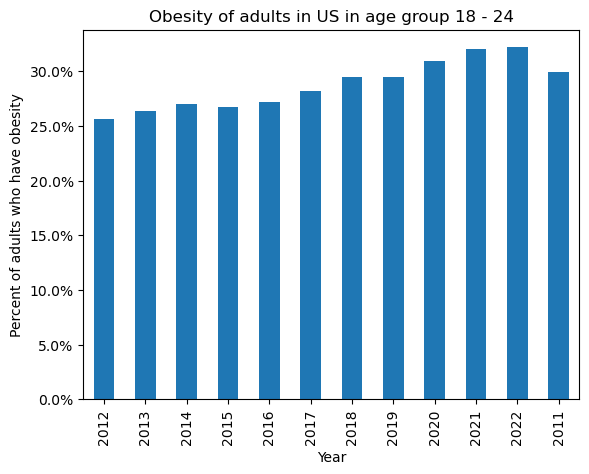

In [8]:
ax = brfss_obesity_age_group_2534['Data_Value'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xlabel='Year', ylabel='Percent of adults who have obesity', title='Obesity of adults in US in age group 18 - 24');

Text(68.30671875, 0.5, 'Percentage')

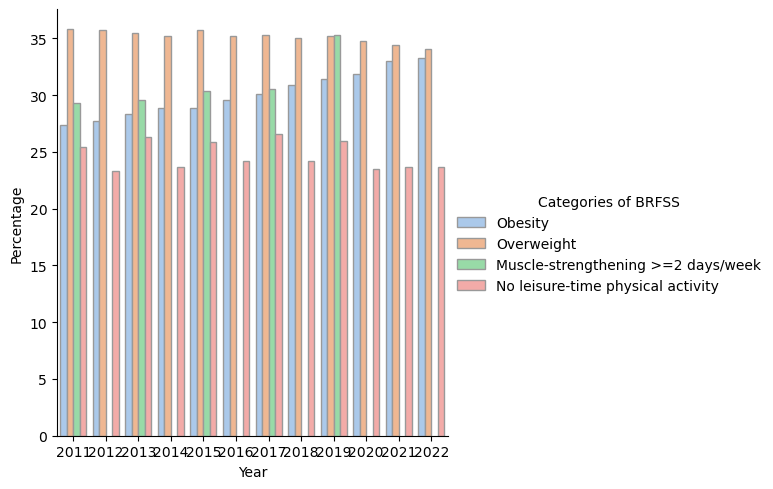

In [34]:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/brfss.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select YearStart, Data_Value from brfss where LocationDesc = 'National' and Total = 'Total' and Question like '%aged 18 years and older who have obesity' order by YearStart"
    brfss_obesity2 = pd.read_sql_query(sqlstatement_obese, conn)
    brfss_obesity2['Data_Value'] = brfss_obesity2['Data_Value'].astype("float")
    brfss_obesity2['Categories of BRFSS'] = 'Obesity'

    sqlstatement_overweight = "select YearStart, Data_Value, \"Age(years)\"  from brfss where LocationDesc = 'National' and Total = 'Total' and Question like 'Percent of adults aged 18 years and older who have an overweight classification' order by YearStart"
    brfss_overweight = pd.read_sql_query(sqlstatement_overweight, conn)
    brfss_overweight['Data_Value'] = brfss_overweight['Data_Value'].astype("float")
    brfss_overweight['Categories of BRFSS'] = 'Overweight'

    sqlstatement_ms2d = "select YearStart, Data_Value from brfss where LocationDesc = 'National' and Total = 'Total' and Question like 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week' order by YearStart"
    brfss_ms2d = pd.read_sql_query(sqlstatement_ms2d, conn)
    brfss_ms2d['Data_Value'] = brfss_ms2d['Data_Value'].astype("float")
    brfss_ms2d['Categories of BRFSS'] = 'Muscle-strengthening >=2 days/week'

    sqlstatement_nophyac = "select YearStart, Data_Value from brfss where LocationDesc = 'National' and Total = 'Total' and Question like 'Percent of adults who engage in no leisure-time physical activity' order by YearStart"
    brfss_nophyac = pd.read_sql_query(sqlstatement_nophyac, conn)
    brfss_nophyac['Data_Value'] = brfss_nophyac['Data_Value'].astype("float")
    brfss_nophyac['Categories of BRFSS'] = 'No leisure-time physical activity'

    brfss_cat = pd.concat([brfss_obesity2, brfss_overweight, brfss_ms2d, brfss_nophyac])
    

g = sns.catplot(
    data=brfss_cat, x="YearStart", y="Data_Value", hue="Categories of BRFSS", kind="bar",
    palette="pastel", edgecolor=".6",
)
plt.xlabel("Year")
plt.ylabel("Percentage")

